# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')
library('ggrepel')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vax_1 <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv")

vax_1 |> head()

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here
df_vacc_rates <- vax_1 |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(n_schools = n(), 
              n_gt95 = sum(mmr >= 95, na.rm=TRUE), 
              pct_gt95 = round(n_gt95 / n_schools, digits = 3)*100)

df_vacc_rates

state,n_schools,n_gt95,pct_gt95
<chr>,<int>,<int>,<dbl>
Arizona,1171,593,50.6
Arkansas,567,2,0.4
California,14225,12639,88.9
Colorado,1507,939,62.3
Connecticut,589,478,81.2
Illinois,7686,6893,89.7
Maine,357,169,47.3
Massachusetts,954,826,86.6
Minnesota,1593,755,47.4


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
smallest_frac_gt95 <- df_vacc_rates |>
    slice_min(order_by = pct_gt95, n = 1)

# Of the schools that reported MMR vaccination rates,
# Arkansas has the smallest fraction of schools >= the target vaccination rate
# of 95% at only 0.4% of all their MMR-reporting schools
smallest_frac_gt95

state,n_schools,n_gt95,pct_gt95
<chr>,<int>,<int>,<dbl>
Arkansas,567,2,0.4


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

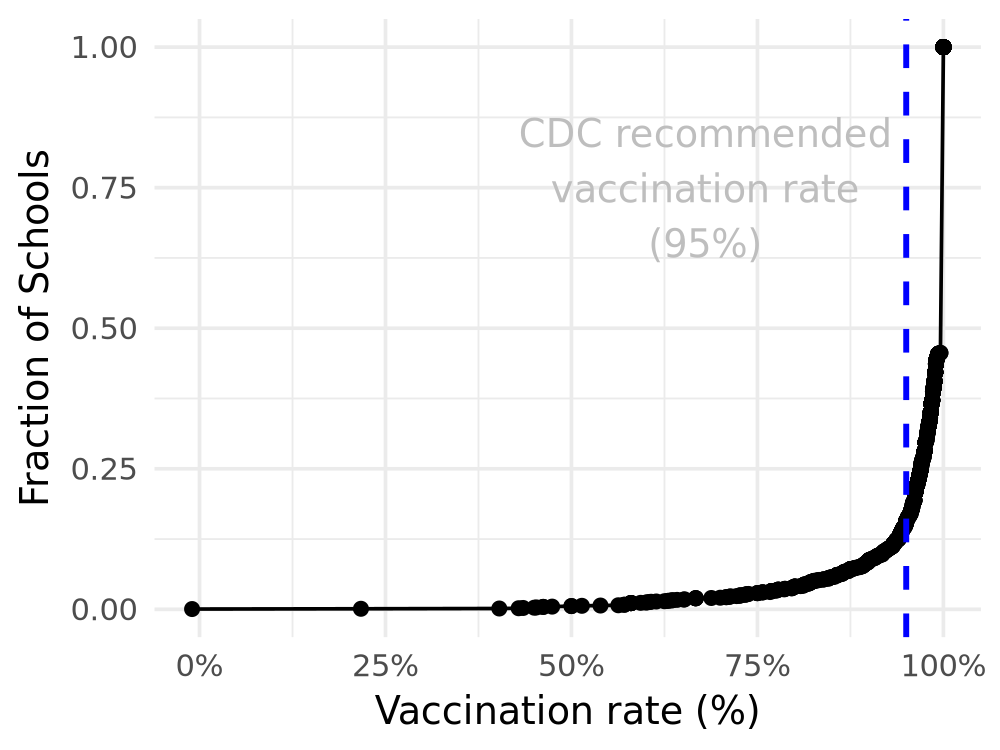

In [5]:
vax_nc <- vax_1 |>
    filter(state == "North Carolina") |>
    arrange(overall) |>
    mutate(ecdf = cume_dist(overall))
    
ggplot(vax_nc, aes(x = overall, y = ecdf)) + 
    geom_point() + 
    geom_line() + 
    geom_vline(xintercept = 95, color = "blue", linetype = "dashed", linewidth = 0.8) + 
    annotate(
        "text",
        x = 68, 
        y = 0.75,
        label = "CDC recommended\nvaccination rate\n(95%)",
        color = "gray"
        ) + 
    theme_minimal() + 
    labs(y = "Fraction of Schools", x = "Vaccination rate (%)") + 
    scale_x_continuous(labels = function(x) paste0(x, "%"))

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [6]:
# As can be seen in the ECDF plot, the median vaccination rate for NC schools is 100%, 
# > the 95% CDC recommended target!
medvax_nc <- vax_nc |> summarize(medvax = median(overall))
medvax_nc

medvax
<dbl>
100
